## Preparación del entorno:

Primero de todo vamos a exponer el tipo de datos de los que disponemos. Directamente extraidos de la API de Twitter en tiempo real. Entonces, disponemos de un dataset inicial de 1000 tweets, pero que para el modelado se utilizará uno subset de 300 tweets.

En el futuro se pretende disponer del dataset entero para modelar.

In [ ]:
#básicos
import pandas as pd
import numpy as np
import re

#graficar
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df=pd.read_csv("tweets.csv")

In [ ]:
df.head()

,User_id,Created_at,Text,Count
0,168944802,2022-10-27 20:34:52+00:00,@mhmck Speaking of Good versus Evil. May the Force be with Ukraine. https://t.co/sv7h6tkqnl,0
1,300846601,2022-10-27 20:34:56+00:00,"German Chancellor spoke to Rishi Sunak on phone today. In a read out we’re told they discussed the war in Ukraine, agreed continued support for Ukraine and continued pressure on Russia to end hostilities. Olaf Scholz encouraged his counterpart to work constructively with the EU",1
2,1507966012280483844,2022-10-27 20:35:00+00:00,"#star_wars Russia's representative to the #UN, Konstantin #Vorontsov, called commercial satellites of the #US and its allies ""legitimate targets"". According to him, Russia is ready to strike at them if they are used in #Ukraine #War_in_Ukraine #space https://t.co/3fodhZYizo",2
3,1259882834329767936,2022-10-27 20:35:01+00:00,be interesting to see if Biden's Ukraine proxy war has an effect on the vote https://t.co/rvL2oTr1Yq https://t.co/M4P0VXsHu1,3
4,300241484,2022-10-27 20:35:04+00:00,The western double standard has no limit. https://t.co/HGC8NBUA8X,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_id     1000 non-null   int64 
 1   Created_at  1000 non-null   object
 2   Text        1000 non-null   object
 3   Count       1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


Limpiamos el texto:

*   Eliminamos links
*   Eliminamos menciones a otros perfiles de Twitter
*   Eliminamos carácteres que no sean de codificación ASCII
*   Eliminamos caracteres multilinea
*   Eliminamos símbolo "#" que denota un *hashtag* (esto se llevará a cabo mas adelante)
*   Otros carácteres de escape y signos de puntuación (también realizado esto más adelante)







In [ ]:
df['Text'] = df['Text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['Text'] = df['Text'].str.replace(r'\s*@\w+', '', regex=True)
df['Text'] = df['Text'].str.replace(r'\s*\B@\w+', '', regex=True)
df['Text'] = df['Text'].str.replace(r'\s*@\S+', '', regex=True)
df['Text'] = df['Text'].str.replace(r'\s*@\S+\b', '', regex=True)
df.Text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df['Text'] = df['Text'].apply(lambda x : str(x).replace('\\n', ',').replace('\\', '').replace("'", "").replace("\n"," "))

In [ ]:
df.head()

,User_id,Created_at,Text,Count
0,168944802,2022-10-27 20:34:52+00:00,Speaking of Good versus Evil. May the Force be with Ukraine.,0
1,300846601,2022-10-27 20:34:56+00:00,"German Chancellor spoke to Rishi Sunak on phone today. In a read out were told they discussed the war in Ukraine, agreed continued support for Ukraine and continued pressure on Russia to end hostilities. Olaf Scholz encouraged his counterpart to work constructively with the EU",1
2,1507966012280483844,2022-10-27 20:35:00+00:00,"#star_wars Russias representative to the #UN, Konstantin #Vorontsov, called commercial satellites of the #US and its allies ""legitimate targets"". According to him, Russia is ready to strike at them if they are used in #Ukraine #War_in_Ukraine #space",2
3,1259882834329767936,2022-10-27 20:35:01+00:00,be interesting to see if Bidens Ukraine proxy war has an effect on the vote,3
4,300241484,2022-10-27 20:35:04+00:00,The western double standard has no limit.,4


Nube de palabras mas frecuentes con STOPWORDS, el cual es importado de la libreria *WordCloud*

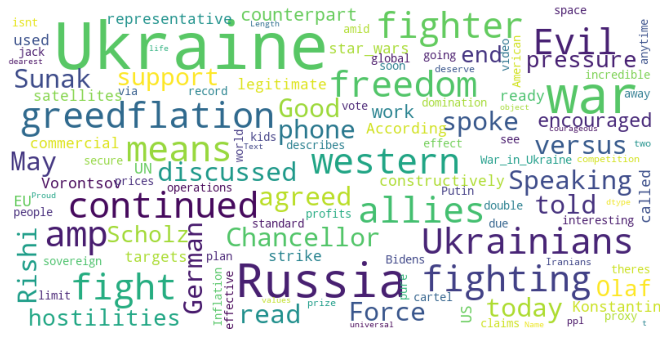

In [ ]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(df['Text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##Hashtags Analysis

In [ ]:
def find_hashtags(string):
    hashtags = [x for x in string if x.startswith('#')]
    
    return hashtags

df['split'] = df['Text'].str.split(' ')
df['hashtags'] = df['split'].apply(lambda row : find_hashtags(row))

In [ ]:
df['hashtags']

0                                                                           []
1                                                                           []
2      [#star_wars, #UN,, #Vorontsov,, #US, #Ukraine, #War_in_Ukraine, #space]
3                                                                           []
4                                                                           []
                                        ...                                   
995                                                                         []
996                                                                         []
997                                                                         []
998                                                                         []
999                                                                         []
Name: hashtags, Length: 1000, dtype: object

In [ ]:
hashtag_expl=[]
for hashtagsList in df["hashtags"]:
    for hashtag in hashtagsList:
        hashtag_expl.append(hashtag)

In [ ]:
topXItem = 25
from collections import Counter

x = Counter(hashtag_expl)

topXItemList = x.most_common(topXItem)

Vemos que los principales hashtags del dataset no nos dicen mucho sobre el sentimiento del tweet en general, a excepción de los últimos. Lo único que podemos comprobar es que los tweets estan en mayor o menor medida centrados en nuestro tema de estudio.

In [ ]:
df_hash = pd.DataFrame(topXItemList)
df_hash.columns =['Hashtag','Tweets']
df_hash

,Hashtag,Tweets
0,#Ukraine,92
1,#Russia,51
2,#UkraineWar,30
3,#war,26
4,#UkraineRussiaWar,23
5,#news,20
6,#,19
7,#Putin,18
8,#NATO,12
9,#Russian,10


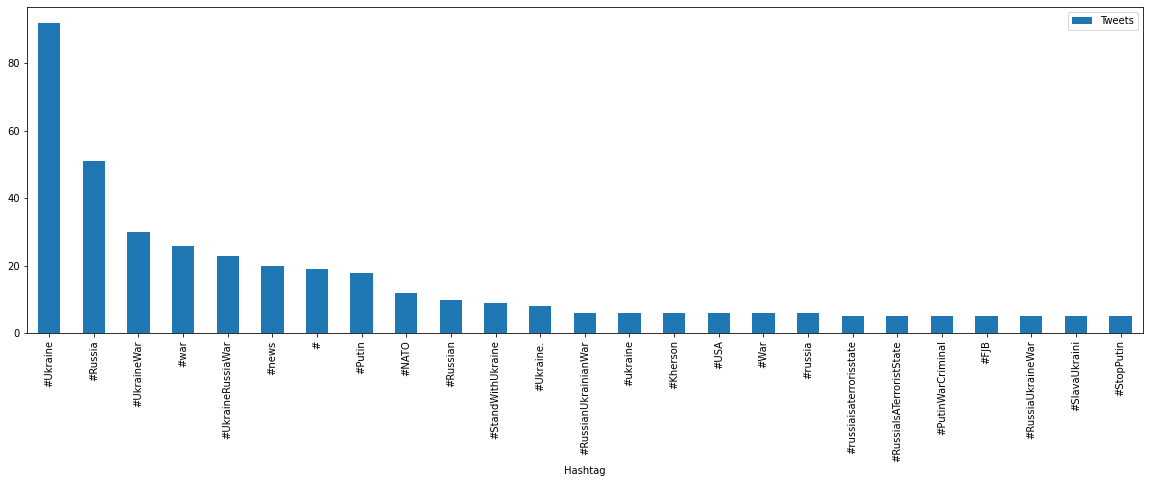

In [ ]:
plt.rcParams["figure.figsize"] = [20, 6]
df_hash.plot.bar(x='Hashtag', y='Tweets', rot=90)

Ahora si, eliminamos el símbolo *#*.

In [ ]:
df['Text'] = df['Text'].apply(lambda x : str(x).replace('#', ''))

## Dataset para el modelo:

Para la obtención del dataset del modelo se ha extraido una muestra aleatoria (*sample()*) del dataset original y se han etiquetado manualmente todos los tweets acorde con el sentimiento con respecto al conflicto: positivo, negativo, neutral.

El criterio que se ha seguido para el etiquetado es el siguiente:

*   **Negativo**: los tweets que se consideran negativos son los que muestran una clara opinión en contra de la guerra hacia el fin de la guerra, por terminos diplomaticos o si no se especifica esto último no con la victoria de uno de los dos bandos. Son tweets que se espera contengan las palabras clave: *peace*, *diplomacy*, *negotiation*,*stop the war*, etc.... Otras opiniones negativas pueden englobar aspectos del conflicto de carácter muy negativo en la sociedad ucraniana como pueden ser: opiniones sobre crimenes de guerra, pobreza, injusticias, victimas del conflicto, etc... (aqui se excluyen los titulares de noticias o artículos periodísticos sin un claro posicionameto).

>>Ejemplo 1: *Bringing joy to vulnerable kids living in war-torn Ukraine is our passion.A soccer ball... A small joy that made a huge impact. Thank you to Pastor Vasily and the team at God's Gift Church.#joyfokids #makingkidssmile #partnerships #Ukraine #peaceforukraine #kidsmatter*

>>Ejemplo 2: *Excellent 30 min discussion on Ukraine war which is affecting the entire world, not just Ukraine &amp Russia Time to negotiate to end the war with its terrible effects over the world-Somalia, Yemen,Africa*

*   **Neutral**: aquellos que únicamente describen el conflicto, titulares de noticias sin una clara opinión sobre el conflicto, tweets no relacionados con el tema de estudio, tweets demasiado cortos como para deducir con palabras clave el sentimiento. También tweets que en parte tratan sobre el tema de estudio pero que su opinión o mensaje estan centrados en otros aspectos fuera del conflicto o que no incumben a los dos países involucrados; esto puede ser por ejemplo opiniones sobre política internacional, nacional y/o economica con el conflicto de trasfondo. 

>>Ejemplo 1: *America must go to Civil war, its time, we need a distraction NOW away from Ukraine, if we dont have a Civil war in the US now, we will all die and the world will end, the democrats have to die*

>> Ejemplo 2:*For all the objective merits of making a shortcut to thr most likely outcome of the Ukraine war and saving tens of thousands of lives, understand that Elon is doing it because the Berlin gigafactory is toast without Russian aluminium and cheap gas*


*   **Positivo**: aquellos en los que el mensaje no se centra en detener el conflicto por la via diplomatica o pacífica, si no todo lo contrario. De un bando o del otro tweets que insisten en la finalización del conflicto por la via bélica. Tweets, también indiferentemente del bando, que intentan justificar el conflicto. Se han incluido también tweets que en su mayor parte son citas de por ejemplo un personaje público que cumpla con cualquiera de las otras condiciones mencionadas anteriormente. 

>>Ejemplo 1: *IMO, the is not maximizing the lessons Ukraine is providing fighting the Russian military There should be a weekly Ukraine War Room (tracking the war and grabbing lessons) discussion in every unit Lessons for infantry, armor, artillery, all MOSs*

>>Ejemplo 2: *We have to ensure that Ukraine wins faster on the battlefield rather than later They will win, but maximum effort is required from all of us to stop theGenocideofUkrainians History will judge us how quickly we were able to stop this madness*



Ignore el nombre del dataframe, puede llevar a confusiones. Al modelar se hace la correcta partición entre dataset de entreno y de test.

In [ ]:
#test=df.sample(n=300)
train=pd.read_csv("test.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  301 non-null    int64  
 1   User_id     301 non-null    float64
 2   Created_at  301 non-null    object 
 3   Text        301 non-null    object 
 4   Count       300 non-null    float64
 5   sentiment   300 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


In [ ]:
train[train.isna().any(axis=1)]

,Unnamed: 0,User_id,Created_at,Text,Count,sentiment
136,427,1.265331e+18,2022-10-27 21:14:06+00:00,Reports of Looting in Kherson as Ukrainians Battle to Retake the City - The New York Times,427.0,NaN
300,446,2.532463e+08,2022-10-27 21:15:42+00:00,Spoken like a true war criminal. https://t.co/1DDn1JlC52,NaN,neutral


In [ ]:
train.loc[136,"sentiment"]="neutral"

In [ ]:
train.loc[22,"sentiment"]="positive"

In [ ]:
train.drop("Unnamed: 0",axis=1, inplace=True)

In [ ]:
train.sort_values("Count", inplace=True)

In [ ]:
train.head()

,User_id,Created_at,Text,Count,sentiment
0,3.002415e+08,2022-10-27 20:35:04+00:00,The western double standard has no limit.,4.0,neutral
1,1.563245e+18,2022-10-27 20:35:35+00:00,Live updates: Russias war inUkraine,6.0,neutral
2,3.067661e+08,2022-10-27 20:35:49+00:00,Well deserved Masih jan! No one can deny the role that Masih has played in uniting and empowering the Iranian women against the IR.,8.0,neutral
3,5.349098e+08,2022-10-27 20:36:08+00:00,"Arkhipov kept his nerve.\n""This was not only the most dangerous moment of the Cold War. It was the most dangerous moment in human history.""\nBut many experts** agree that the #NATO proxy war in #Ukraine against #Russia is far more dangerous.\n 1/2\n#nuclearwar",14.0,negative
4,1.401592e+18,2022-10-27 20:36:09+00:00,Vladimir Putin said the world faced the most dangerous decade since World War Two during an appearance in which he heavily condemned the West and its apparent attitude towards Russia and the Ukraine war.\n,15.0,negative


Aplicamos algo más de limpieza de datos, esta vez eliminamos signos de puntuación.

In [ ]:
train['Text'] = train['Text'].apply(lambda x : str(x).replace('#', '').replace('\\n', ',').replace('\\', '').replace("'", "").replace("\n"," "))

def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
train['Text'] = train['Text'].apply(remove_punctuation)


In [ ]:
train.to_csv("train.csv")

Creamos una columna con la codificación de la variable categórica sentimiento.

In [ ]:
train=pd.read_csv("train.csv",sep=",",lineterminator='\n')

In [ ]:
train['score'] = (
    np.select(
        condlist=[train['sentiment'] == "positive", train['sentiment'] == "negative"], 
        choicelist=[1, -1], 
        default=0))

Visualizamos la distribución de dicha variable. Vemos que nos ha quedado, como era de esperar un dataset imbalanceado: con muy pocos positivos.

Algo sorprendente es la cantidad de neutrales.

In [ ]:
train["sentiment"].value_counts()

neutral     193
negative     80
positive     28
Name: sentiment, dtype: int64

In [ ]:
fig = px.histogram(train, x="sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Tweet Sentiment')
fig.show()

In [ ]:
sentiment_score_df = train[['sentiment', 'score']].drop_duplicates().sort_values('score')
sentiment_score = dict(sentiment_score_df.values)
sentiment_score["negative"]=0
sentiment_score["neutral"]=1
sentiment_score["positive"]=2
sentiment_score

{'negative': 0, 'positive': 2, 'neutral': 1}

Este último calculo y modificación se ha hecho para un cálculo que presentaremos más adelante.

## Modelamos:

Para este problema de predicción de variables categóricas multinomiales emplearemos dos modelos y compararemos el ajuste que tienen. 

En primer lugar se llevará a cabo una regresión logística, que en el caso de la libreria scikit-learn permite ajustar para variables dependientes multinomiales. 

En segundo lugar emplearemos el modelo Naive Bayes Multinomial.

En ambos casos estamos ante un problema en el que emplearemos dos algoritmos de ML supervisados. 

El primer inconveniente que nos encontramos es el procesado del texto: los clasificadores y algoritmos no pueden procesar directamente textos en su forma original, dado que estan diseñados para recibir vectores númericos. Por lo tanto, habrá que hacer un preprocesado de dichos textos, además de la limpieza de datos que ya hemos realizado anteriormente.

Un planteamiento bastante común es utilizar el modelo *bag of words*, o bolsa de palabras/banco de palabras. Un modelo que tiene en cuenta por cada texto la presencia y la frecuencia de las palabras que aparecen aunque ignora el orden de estas.

Concretamente para cada tweet de nuestro dataset calcularemos la frecuencia de los unigramas y bigramas (esto es la frecuencia de una sola palabra y la frecuencia en la que aparecen dos palabras juntas). Así tenemos dicha medida abreviada a *tf-idf*. Para esto utilizaremos *sklearn.feature_extraction.text.TfidVectorizer*. Los argumentos que aparecen son los siguientes:



*   *sublinear_df*: Verdadero para utilizar la forma logaritmica de frecuencia
*   *min_df*: número mínimo que una palabra ha de aparecer en un tweet
*   *norm*: asignado a 12 para que todo nuestro vector de características tenga una norma de Euclides de 1.
*   *ngram_range*: asignado en (1,2) para indicar que queremos palabras solas y acompañadas de una palabra mas.
*   *stop_words*: asignado a inglés para eliminar ruido de los tweets. Es decir, palabras como pronombres.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(train.Text).toarray()
labels = train.sentiment
features.shape

(301, 117)

De esta forma tenemos 117 características o palabras que caracterizan a cada uno de los tweets que tenemos representando nuestro *tfidf* para los diferentes unigramas y bigramas.

Veamos ahora cuales son las palabras más correlacionadas con cada sentimiento.

Para ello utilizaremos *sklearn.feature_selection.chi2*. Notese N=4 indicando que queremos las 4 palabras y 4 parejas de palabras mas correlacionadas con cada sentimiento.

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 4
for sentiment, score in sorted(sentiment_score.items()):
  features_chi2 = chi2(features, labels == sentiment)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(sentiment))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'negative':
  . Most correlated unigrams:
. end
. pure
. evil
. dangerous
  . Most correlated bigrams:
. dangerous bloody
. putin slams
. slams west
. west dangerous
# 'neutral':
  . Most correlated unigrams:
. oil
. dangerous
. stop
. trump
  . Most correlated bigrams:
. dangerous bloody
. slams west
. west dangerous
. putin slams
# 'positive':
  . Most correlated unigrams:
. trump
. time
. stop
. good
  . Most correlated bigrams:
. ukraine russia
. diplomacy end
. russia ukraine
. russias war


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Los resultados son algo deseperanzadores, las parejas de palabras de los sentimientos neutrales y negativo coinciden... Por otra parte los unigramas del sentimiento positivo tampoco nos da mucha información, en cambio el del negativo parece lo esperado.

Esto nos indica que más adelante tendremos problemas en nuestros modelos, dado que no podra diferenciar bien entre neutral y negativo, sumado a que tenemos un dataset imbalanceado; hay muy pocos positivos...

Parece ser que un mejor etiquetado de los datos puede ayudar a mejorar esto y a su vez mejorar el ajuste y calidad del modelo, sea cual sea.

## Regresión logística:


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train["Text"], train["sentiment"], 
                                                    test_size=0.25,
                                                    random_state = 42)
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LogisticRegression(random_state=0).fit(X_train_tfidf, y_train)

Vemos como nuestro modelo tiene un rendimiento bastante bajo, tanto en el set de entreno como en el de validación.

In [ ]:
clf.score(count_vect.transform(X_train),y_train)

0.6444444444444445

In [ ]:
clf.score(count_vect.transform(X_test),y_test)

0.3815789473684211

Vemos que no ha predicho ningún positivo correcto, curiosamente ha clasificado 10 positivos (los unicos en la muestra) como negativos...

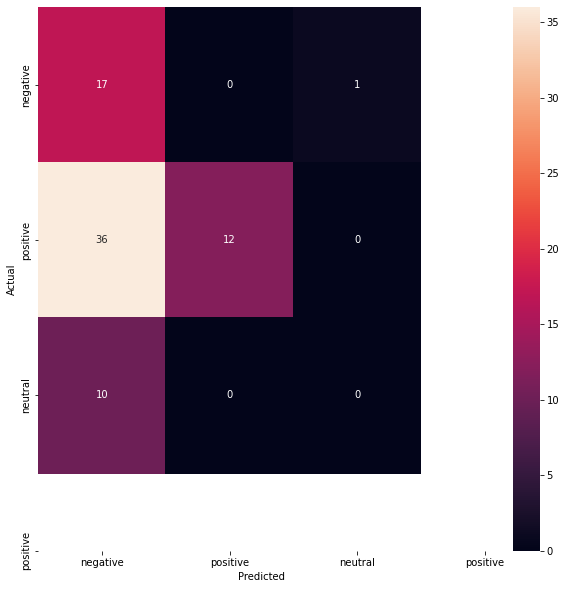

In [ ]:
y_pred = clf.predict(count_vect.transform(X_test))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentiment_score_df.sentiment.values, yticklabels=sentiment_score_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.27      0.94      0.42        18
     neutral       1.00      0.25      0.40        48
    positive       0.00      0.00      0.00        10

    accuracy                           0.38        76
   macro avg       0.42      0.40      0.27        76
weighted avg       0.70      0.38      0.35        76



## Naives Bayes Multinomial:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train["Text"], train["sentiment"], 
                                                    test_size=0.25,
                                                    random_state = 42)
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
mnb = MultinomialNB().fit(X_train_tfidf, y_train)

El modelo multinomial mejora sustancialmente a primera vista el modelo logístico visto anteriormente. Aún asi es una puntuación algo baja en la validación.

In [ ]:
mnb.score(count_vect.transform(X_train),y_train)

0.8222222222222222

In [ ]:
mnb.score(count_vect.transform(X_test),y_test)

0.6447368421052632

Mirando la matriz de confusión vemos como practicamente todo lo ha clasificado como neutral, valor predominante en la muestra. De la misma forma ha clasificado como negativo 1 valor positivo y 9 neutrales que en realidad son positivos...

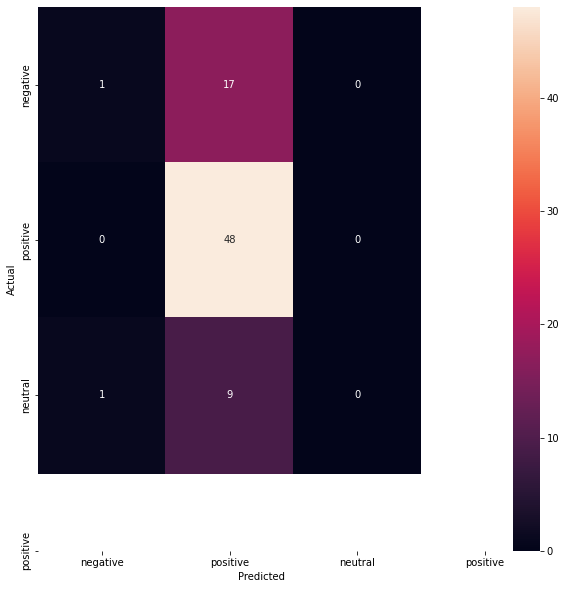

In [ ]:
y_pred = mnb.predict(count_vect.transform(X_test))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentiment_score_df.sentiment.values, yticklabels=sentiment_score_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Todo esto nos lleva a la conclusión que en realidad hay que mejorar el preprocesado de los textos, obteniendo unos criterios de etiquetado mucho más claros y arbitrarios de acuerdo a palabras clave que podamos encontrar.

A su vez, la obtención de un dataset más grande es esencial para una mejor predicción y rendimiento de nuestros modelos.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.50      0.06      0.10        18
     neutral       0.65      1.00      0.79        48
    positive       0.00      0.00      0.00        10

    accuracy                           0.64        76
   macro avg       0.38      0.35      0.30        76
weighted avg       0.53      0.64      0.52        76



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## LSTM

In [ ]:
from sklearn.preprocessing import LabelEncoder

revisiones_texto, etiquetas_texto =train["Text"].tolist(), train["sentiment"].tolist()
label_encoder = LabelEncoder()
label_encoder.fit(etiquetas_texto)
y = label_encoder.transform(etiquetas_texto)

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import Counter
import random
import matplotlib.pyplot as plt
import numpy as np



def addBeginSeqSymbol(sequences): 
    newSeqs = []
    for seq in sequences:
        newSeqs.append([1] + [value+1 for value in seq])
    newSeqs = np.array(newSeqs)
    return newSeqs

In [ ]:
print("Vectorizing...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(revisiones_texto)
# convertimos las instancias en arrays de ID de palabra
tr_sequences = tokenizer.texts_to_sequences(revisiones_texto)

Vectorizing...


In [ ]:
# anadimos símbolo de inicio de frase
tr_sequences = addBeginSeqSymbol(tr_sequences) # vamos a empezar todas las secuencias con el símbolo reservado 1. +1 al resto de IDs, para hacerlo único a este propósito
 
word_index = {k: v+1 for k, v in tokenizer.word_index.items()} # +1 ya que el 0 está reservado para padding, y el 1 ya lo hemos reservado para el inicio de la secuencia
index_word = {v: k for k,v in word_index.items()}
max_features = max(word_index.values())+1 # +1 ya que la posición de max_features es también accesible via índice

<ipython-input-48-22568f9b21e2>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newSeqs = np.array(newSeqs)


In [ ]:
max_features

2224

In [ ]:
print('Padding sequences (samples x time)...')
x = sequence.pad_sequences(tr_sequences)

Padding sequences (samples x time)...


In [ ]:
from sklearn.model_selection import train_test_split

#Split 75/25
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.75)

#Del split 20% hacemos un split 50/50
#X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_rem.shape), print(y_rem.shape)


(225, 56)
(225,)
(76, 56)
(76,)


(None, None)

In [ ]:
def get_class_distribution(obj):
    count_dict = {
        "negative": 0,
        "neutral": 0,
        "positive": 0
    }
    
    for i in obj:
        if i == 0: 
            count_dict['negative'] += 1
        elif i == 1: 
            count_dict['neutral'] += 1
        elif i == 2: 
            count_dict['positive'] += 1            
        else:
            print("Check classes.")
            
    return count_dict

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset, WeightedRandomSampler
from tensorflow.keras.utils import to_categorical

#crear Tensor datasets

train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(X_rem), torch.from_numpy(y_rem))
#test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))



target_list = []
for _, t in train_data:
    target_list.append(t)
    
target_list = torch.tensor(target_list)

class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([0.0179, 0.0067, 0.0526])


In [ ]:
class_weights_all = class_weights[target_list]

In [ ]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [ ]:
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size,sampler=weighted_sampler)
valid_loader = DataLoader(valid_data, batch_size=1)
#test_loader = DataLoader(test_data, batch_size=1)

In [ ]:
# comprobamos si hay alguna GPU disponible
train_on_gpu = torch.cuda.is_available()

if(train_on_gpu):
    device = torch.device('cuda')
    print('Training on GPU.')
else:
    device = torch.device('cpu')
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [ ]:
import torch.nn as nn
embedding_dim=100
hidden_dim = embedding_dim
output_dim = 3


class LSTM(nn.Module):
  def __init__(self, vocabulary_size, embedding_size, hidden_dim,
               output_dim, device):
    super().__init__()

    self.output_size = output_dim
    self.hidden_dim = hidden_dim
    self.device=device

    self.embedding = nn.Embedding(vocabulary_size, embedding_size)

    self.lstm = nn.LSTM(embedding_size, hidden_dim, batch_first=True)
    self.fc1 = nn.Linear(hidden_dim, output_dim)
    
    self.sig = nn.Softmax()

  def forward(self, x):

    x = self.embedding(x)

    x = x.float()

    lstm_out, hidden = self.lstm(x)
    lstm_out = lstm_out[:, -1, :]
    out = self.fc1(lstm_out)
    sig_out = self.sig(out)
    return sig_out

In [ ]:
model = LSTM(max_features, embedding_dim, hidden_dim,
               output_dim, device)

In [ ]:
print(model)

LSTM(
  (embedding): Embedding(2224, 100)
  (lstm): LSTM(100, 100, batch_first=True)
  (fc1): Linear(in_features=100, out_features=3, bias=True)
  (sig): Softmax(dim=None)
)


In [ ]:
lr=0.001
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

history = {"loss":[], "val_loss":[], "acc":[], "val_accuracy":[]}

In [ ]:
print("Begin training.")
epochs=15
if(train_on_gpu):
    model.cuda()
for e in range(epochs):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()

    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in valid_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    history['loss'].append(train_epoch_loss/len(train_loader))
    history['val_loss'].append(val_epoch_loss/len(valid_loader))
    history['acc'].append(train_epoch_acc/len(train_loader))
    history['val_accuracy'].append(val_epoch_acc/len(valid_loader))
                              
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(valid_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(valid_loader):.3f}')

Begin training.


<ipython-input-83-354ae8c4bf67>:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  sig_out = self.sig(out)


Epoch 000: | Train Loss: 1.05241 | Val Loss: 1.11644 | Train Acc: 45.750| Val Acc: 15.789
Epoch 001: | Train Loss: 1.01927 | Val Loss: 1.14262 | Train Acc: 35.250| Val Acc: 13.158
Epoch 002: | Train Loss: 0.94264 | Val Loss: 1.18474 | Train Acc: 33.125| Val Acc: 13.158
Epoch 003: | Train Loss: 0.90640 | Val Loss: 1.24041 | Train Acc: 34.250| Val Acc: 13.158
Epoch 004: | Train Loss: 0.88525 | Val Loss: 1.22647 | Train Acc: 31.875| Val Acc: 14.474
Epoch 005: | Train Loss: 0.75014 | Val Loss: 1.20855 | Train Acc: 53.125| Val Acc: 18.421
Epoch 006: | Train Loss: 0.84480 | Val Loss: 1.19552 | Train Acc: 43.625| Val Acc: 21.053
Epoch 007: | Train Loss: 0.78540 | Val Loss: 1.17979 | Train Acc: 50.125| Val Acc: 22.368
Epoch 008: | Train Loss: 0.75806 | Val Loss: 1.16230 | Train Acc: 66.000| Val Acc: 31.579
Epoch 009: | Train Loss: 0.72899 | Val Loss: 1.13943 | Train Acc: 75.000| Val Acc: 28.947
Epoch 010: | Train Loss: 0.68400 | Val Loss: 1.12537 | Train Acc: 74.875| Val Acc: 34.211
Epoch 011:

In [ ]:
import matplotlib.pyplot as pyplot

def plot_acc(data):
  plt.figure(figsize=(6,8))
  plt.plot(data["loss"], label="loss")
  plt.plot(data["val_loss"], label="val_loss")
  plt.legend()
  plt.show()
  plt.close()
  print()
  plt.plot(data["val_accuracy"],label="val_accuracy")
  plt.plot(data["acc"], label="train_accuracy")
  plt.legend()
  plt.show()
  plt.close()

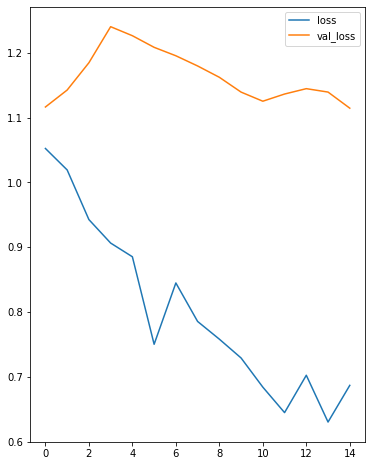

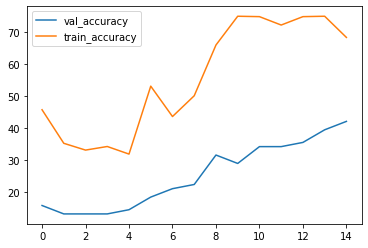

In [ ]:
plot_acc(history)

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in valid_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

<ipython-input-83-354ae8c4bf67>:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  sig_out = self.sig(out)


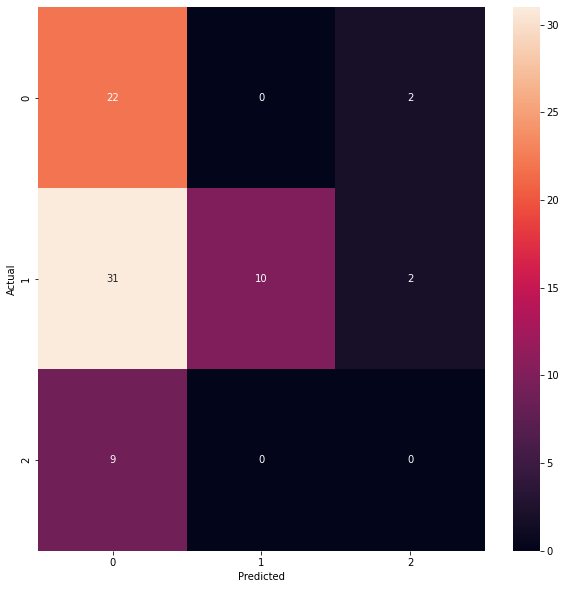

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
conf_mat = confusion_matrix(y_rem, y_pred_list)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_rem, y_pred_list))

              precision    recall  f1-score   support

           0       0.35      0.92      0.51        24
           1       1.00      0.23      0.38        43
           2       0.00      0.00      0.00         9

    accuracy                           0.42        76
   macro avg       0.45      0.38      0.30        76
weighted avg       0.68      0.42      0.38        76



In [ ]:
dropout=0.1
num_layers=2

class LSTM1(nn.Module):
  def __init__(self, vocabulary_size, embedding_size, hidden_dim,
               output_dim, dropout, num_layers):
    super().__init__()

    self.output_size = output_dim
    self.hidden_dim = hidden_dim
    self.num_layers=num_layers

    self.embedding = nn.Embedding(vocabulary_size, embedding_size)

    self.lstm = nn.LSTM(embedding_size, hidden_dim,bidirectional=True, num_layers=self.num_layers,dropout=dropout, batch_first=True)
    self.fc1 = nn.Linear(hidden_dim*2, hidden_dim)
    self.fc2=nn.Linear(hidden_dim,output_dim)
    self.dropout = nn.Dropout(dropout)
    self.sig = nn.Softmax()

  def forward(self, x):

    x = self.embedding(x)

    x = x.float()

    lstm_out, hidden = self.lstm(x)
    lstm_out = lstm_out[:, -1, :]

    out = self.dropout(lstm_out)
    out = self.fc1(out)
    out = self.dropout(out)
    out = self.fc2(out)
    sig_out = self.sig(out)
    return sig_out

In [ ]:
model2=LSTM1(max_features, embedding_dim, hidden_dim,
               output_dim, dropout,num_layers)

In [ ]:
lr=0.001
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)

In [ ]:
print(model2)

LSTM1(
  (embedding): Embedding(2224, 100)
  (lstm): LSTM(100, 100, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (fc1): Linear(in_features=200, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (sig): Softmax(dim=None)
)


In [ ]:
history2 = {"loss":[], "val_loss":[], "acc":[], "val_accuracy":[]}

In [ ]:
print("Begin training.")
epochs=15
if(train_on_gpu):
    model2.cuda()
for e in range(epochs):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model2.train()

    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model2(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model2.eval()
        for X_val_batch, y_val_batch in valid_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model2(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    history2['loss'].append(train_epoch_loss/len(train_loader))
    history2['val_loss'].append(val_epoch_loss/len(valid_loader))
    history2['acc'].append(train_epoch_acc/len(train_loader))
    history2['val_accuracy'].append(val_epoch_acc/len(valid_loader))
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(valid_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(valid_loader):.3f}')

Begin training.


<ipython-input-95-e64f8d432b0f>:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  sig_out = self.sig(out)


Epoch 000: | Train Loss: 1.05783 | Val Loss: 1.15568 | Train Acc: 40.625| Val Acc: 11.842
Epoch 001: | Train Loss: 0.86416 | Val Loss: 1.41691 | Train Acc: 43.000| Val Acc: 11.842
Epoch 002: | Train Loss: 0.82574 | Val Loss: 1.43274 | Train Acc: 43.875| Val Acc: 11.842
Epoch 003: | Train Loss: 0.95980 | Val Loss: 1.43298 | Train Acc: 29.625| Val Acc: 11.842
Epoch 004: | Train Loss: 0.84179 | Val Loss: 1.43300 | Train Acc: 41.500| Val Acc: 11.842
Epoch 005: | Train Loss: 0.84394 | Val Loss: 1.43301 | Train Acc: 41.125| Val Acc: 11.842
Epoch 006: | Train Loss: 0.97712 | Val Loss: 1.43301 | Train Acc: 28.500| Val Acc: 11.842
Epoch 007: | Train Loss: 0.95119 | Val Loss: 1.43301 | Train Acc: 31.250| Val Acc: 11.842
Epoch 008: | Train Loss: 0.81763 | Val Loss: 1.43301 | Train Acc: 43.875| Val Acc: 11.842
Epoch 009: | Train Loss: 0.96385 | Val Loss: 1.43301 | Train Acc: 28.125| Val Acc: 11.842
Epoch 010: | Train Loss: 0.94384 | Val Loss: 1.43301 | Train Acc: 30.375| Val Acc: 11.842
Epoch 011: